In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

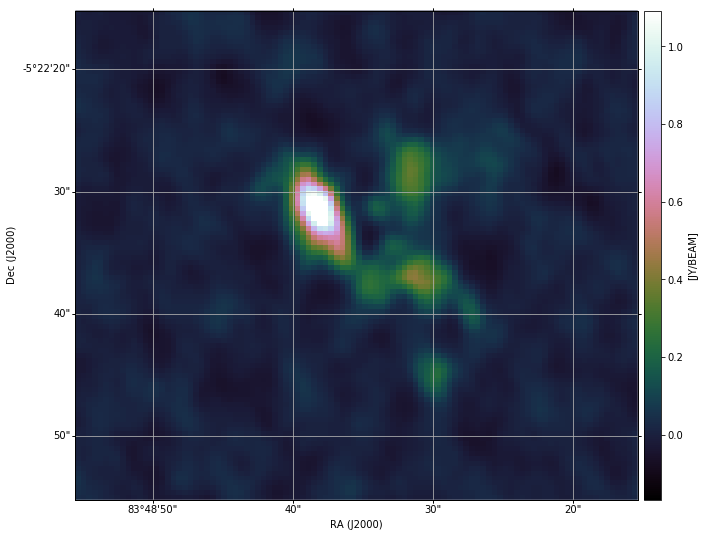

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In this experiment we run multiple instances of HDMC with different values for `kappa`. The `kappa` parameter controls the lenght after a gaussian is trunctated. The truncation threshold corresponds to `kappa * maxsig`, where `maxsig` is the maximum standar deviation allowed for a Gaussian.

#### Baseline values

In [3]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=False, n_center=200, kappa=1000)
hdmc.build_gmr()
u_baseline = hdmc.get_approximation()
w_baseline, sig_baseline = hdmc.get_params_mapped()

***

In [4]:
kappa_values = np.arange(3., 7.01, 0.25)

w_errors = []
sig_errors = []
u_errors = []
times = []

for kappa in kappa_values:
    print("Processing for kappa = {0}".format(kappa))
    hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=False, n_center=200, kappa=kappa)
    hdmc.build_gmr()
    d = hdmc.data
    u = hdmc.get_approximation()
    mask = hdmc.mask 
    w,sig = hdmc.get_params_mapped()
    # computing errors
    w_errors.append( (np.linalg.norm(w-w_baseline, ord=2), np.linalg.norm(w-w_baseline, ord=np.inf))  )
    sig_errors.append( (np.linalg.norm(sig-sig_baseline, ord=2), np.linalg.norm(sig-sig_baseline, ord=np.inf)) )
    u_errors.append( (np.linalg.norm(d[mask]-u[mask], ord=2), np.linalg.norm(d[mask]-u[mask], ord=np.inf)) )
    # saving the time
    times.append(hdmc.elapsed_time)
    # releasing memory
    del hdmc

Processing for kappa = 3.0
Processing for kappa = 3.25
Processing for kappa = 3.5
Processing for kappa = 3.75
Processing for kappa = 4.0
Processing for kappa = 4.25
Processing for kappa = 4.5
Processing for kappa = 4.75
Processing for kappa = 5.0
Processing for kappa = 5.25
Processing for kappa = 5.5
Processing for kappa = 5.75
Processing for kappa = 6.0
Processing for kappa = 6.25
Processing for kappa = 6.5
Processing for kappa = 6.75
Processing for kappa = 7.0


In [19]:
# splitting errors
w_errors1 = [err for err,_ in w_errors]
sig_errors1 = [err for err,_ in sig_errors]
u_errors1 = [err for err,_ in u_errors]

w_errors2 = [err for _,err in w_errors]
sig_errors2 = [err for _,err in sig_errors]
u_errors2 = [err for _,err in u_errors]

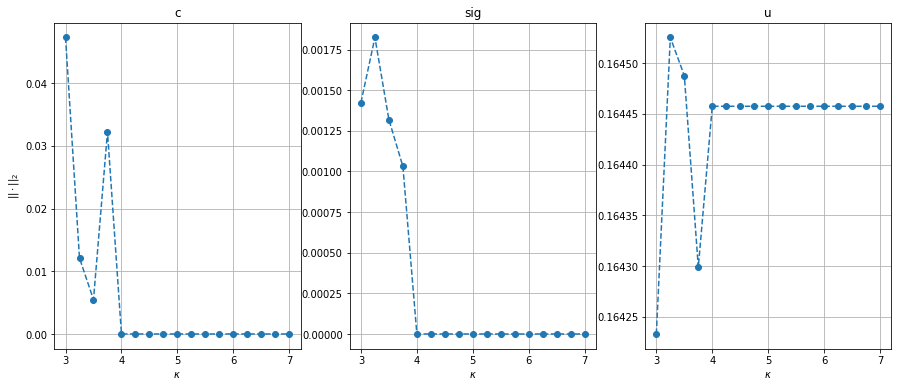

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.plot(kappa_values, w_errors1, "o--")
plt.grid()
plt.title("c")
plt.ylabel("$|| \cdot ||_{2}$")
plt.xlabel("$\kappa$")

plt.subplot(1,3,2)
plt.plot(kappa_values, sig_errors1, "o--")
plt.grid()
plt.title("sig")
plt.xlabel("$\kappa$")

plt.subplot(1,3,3)
plt.plot(kappa_values, u_errors1, "o--")
plt.grid()
plt.title("u")
plt.xlabel("$\kappa$")
plt.show()

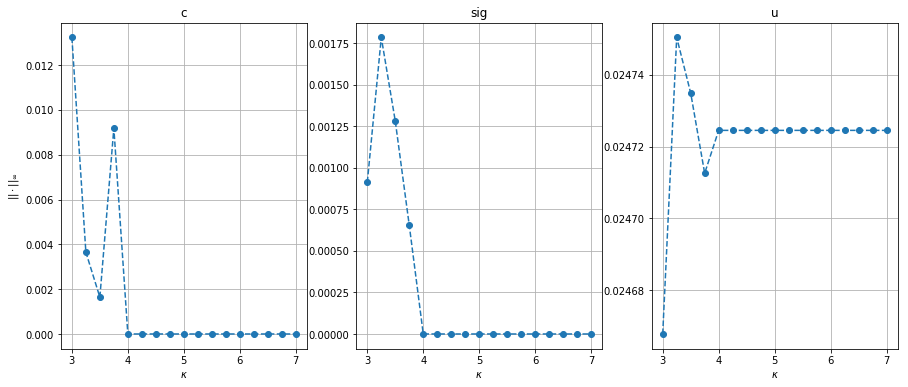

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.plot(kappa_values, w_errors2, "o--")
plt.grid()
plt.title("c")
plt.ylabel("$|| \cdot ||_{\infty}$")
plt.xlabel("$\kappa$")

plt.subplot(1,3,2)
plt.plot(kappa_values, sig_errors2, "o--")
plt.grid()
plt.title("sig")
plt.xlabel("$\kappa$")

plt.subplot(1,3,3)
plt.plot(kappa_values, u_errors2, "o--")
plt.grid()
plt.title("u")
plt.xlabel("$\kappa$")
plt.show()